In [1]:
import os
import shap
import joblib
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('../')
warnings.filterwarnings('ignore')

In [2]:
lr = joblib.load('models/lr.joblib')

In [3]:
df = pd.read_csv('data/pre-model/data.csv')
X, y  = df.drop('Estado del egreso', axis = 1), df['Estado del egreso']

In [4]:
importance = pd.DataFrame({
    'features': X.columns,
    'coef': lr.coef_[0]
})

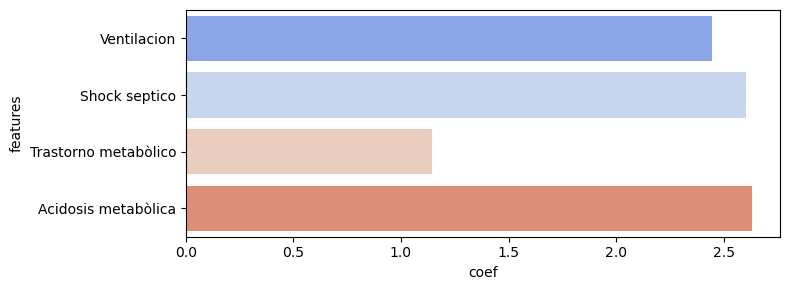

In [5]:
plt.figure(figsize=(8, 3))
sns.barplot(data=importance, x='coef', y='features', palette='coolwarm')
plt.tight_layout()
plt.show()

In [6]:
probs = lr.predict_proba(X)[:, 0]

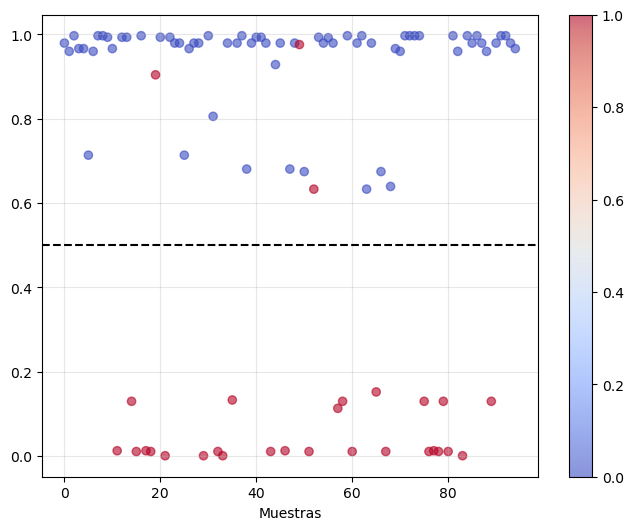

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y)), probs, c=y, cmap='coolwarm', alpha=0.6)
plt.axhline(y=0.5, color='black', linestyle='--', label='Umbral 0.5')
plt.xlabel("Muestras")
plt.colorbar()
plt.grid(alpha=0.3)
plt.show()

In [8]:
explainer = shap.LinearExplainer(lr, X)
shap_values = explainer(X)

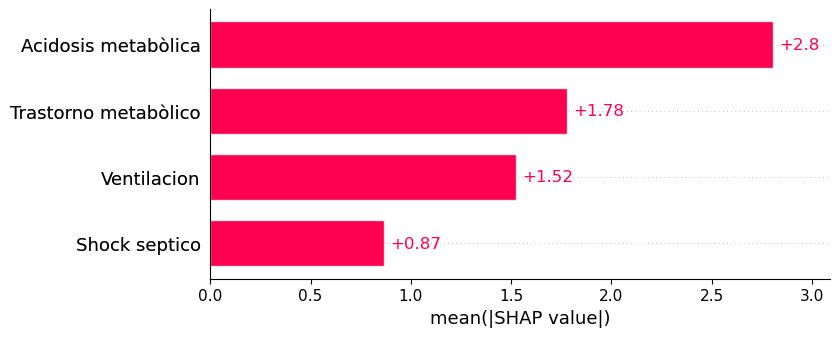

In [9]:
shap.plots.bar(shap_values)